In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [49]:
image_path = r"C:\Users\acer\Downloads\leaf_image.jpeg"  

In [50]:
if os.path.exists(image_path):
    print("File exists:", image_path)
else:
    print("File not found at:", image_path)

File exists: C:\Users\acer\Downloads\leaf_image.jpeg


In [51]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

In [52]:
blurred_image = cv2.GaussianBlur(image, (25, 25), sigmaX=30, sigmaY=30)

In [53]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [54]:
edges = cv2.Canny(gray_image, 100, 200)

In [55]:
dilated_edges = cv2.dilate(edges, kernel=np.ones((3, 3), np.uint8), iterations=1)

In [56]:
mask = cv2.bitwise_not(dilated_edges)

In [57]:
mask = cv2.GaussianBlur(mask, (21, 21), sigmaX=10)

In [58]:
mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

In [59]:
mask_normalized = mask_3channel / 255.0


In [60]:
blended_image = (image * mask_normalized + blurred_image * (1 - mask_normalized)).astype(np.uint8)

In [61]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])

In [62]:
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)


In [63]:
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(-0.5, 450.5, 599.5, -0.5)

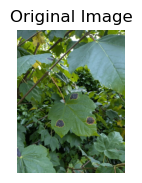

In [64]:
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")


(-0.5, 450.5, 599.5, -0.5)

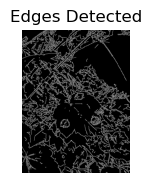

In [65]:
plt.subplot(1, 4, 2)
plt.title("Edges Detected")
plt.imshow(edges, cmap="gray")
plt.axis("off")

(-0.5, 450.5, 599.5, -0.5)

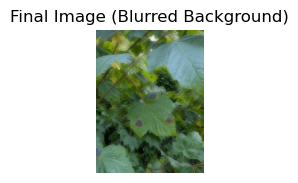

In [66]:
# Final Image with Blurred Background
plt.subplot(1, 4, 3)
plt.title("Final Image (Blurred Background)")
plt.imshow(blended_image)
plt.axis("off")

(-0.5, 450.5, 599.5, -0.5)

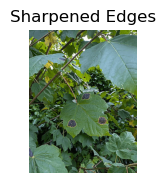

In [67]:
# Sharpened Image
plt.subplot(1, 4, 4)
plt.title("Sharpened Edges")
plt.imshow(sharpened_image)
plt.axis("off")

In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>